<a href="https://colab.research.google.com/github/lilia-sanchez/LILY-SANCHEZ/blob/main/Lab11_DIVERS_REFLEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigation of Diver Reflex Using ECG

#### When the face is submerged and water fills the nostrils, sensory receptors sensitive to wetness within the nasal cavity and other areas of the face supplied by the fifth (V) cranial nerve (the trigeminal nerve) relay the information to the brain.[1] The tenth (X) cranial nerve, (the vagus nerve) – part of the autonomic nervous system – then produces bradycardia and other neural pathways elicit peripheral vasoconstriction, restricting blood from limbs and all organs to preserve blood and oxygen for the heart and the brain (and lungs), concentrating flow in a heart–brain circuit and allowing the animal to conserve oxygen.[3][6]

In humans, the diving reflex is not induced when limbs are introduced to cold water. Mild bradycardia is caused by subjects holding their breath without submerging the face in water.[10][11] When breathing with the face submerged, the diving response increases proportionally to decreasing water temperature.[8] However, the greatest bradycardia effect is induced when the subject is holding their breath with their face wetted.[10] Apnea with nostril and facial cooling are triggers of this reflex.[1][8]

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.stats import sem
from statistics import mean, stdev
import scipy.stats as stats

## Import data (control (holding breath) and head submerged) for individual #1

In [3]:
control = pd.read_csv (r'./Held_Breath.txt', sep = '\t')
control

,Time,Lead II
0,0.00,0.000000
1,0.01,0.000000
2,0.02,0.000000
3,0.03,0.000000
4,0.04,0.000000
...,...,...
3015,30.15,-0.079530
3016,30.16,-0.057004
3017,30.17,-0.061247
3018,30.18,-0.022577


In [4]:
dive = pd.read_csv (r'./Divers_Response.txt', sep = '\t')
dive

,Time,Lead II
0,0.00,0.000000
1,0.01,0.000000
2,0.02,0.000000
3,0.03,0.000000
4,0.04,0.000000
...,...,...
3035,30.35,0.031240
3036,30.36,0.008320
3037,30.37,-0.014132
3038,30.38,0.005045


## Visualize control data (holding breath without submmersion)

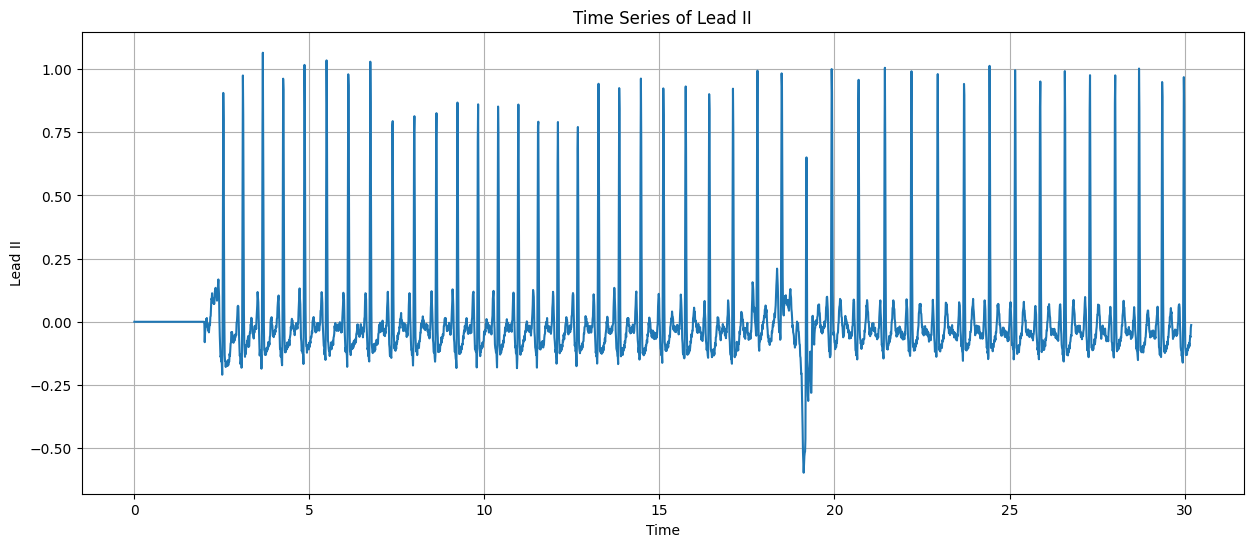

In [5]:
df = pd.DataFrame(control)

# Plot the data to visually inspect
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['Lead II'])
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('Time Series of Lead II')
plt.grid(True)
plt.show()

## Detect R waves in the window between 25 and 30 seconds

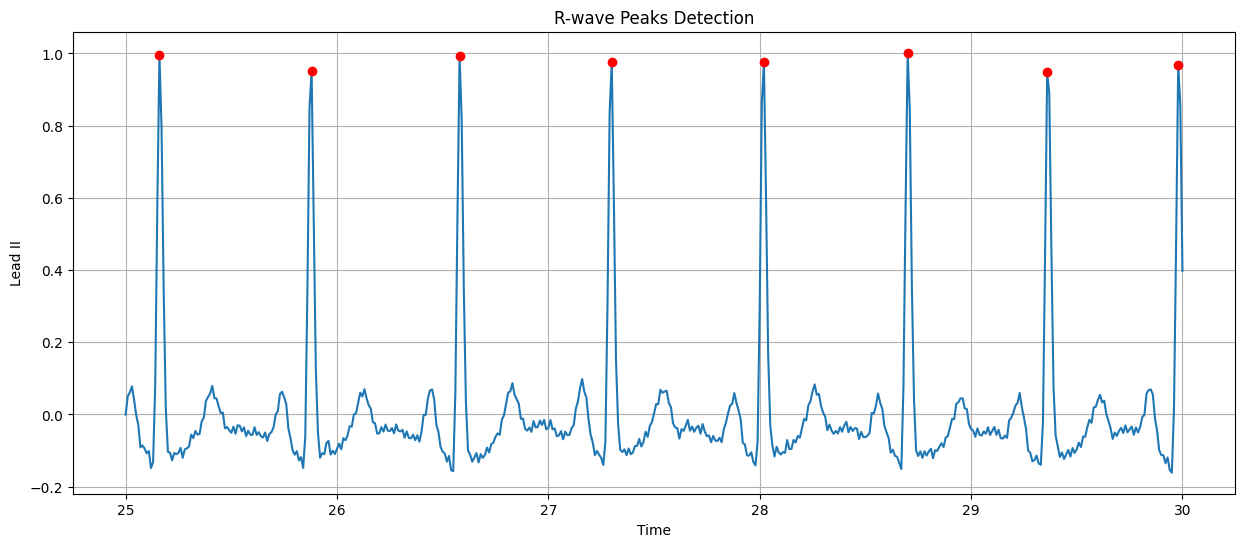

In [6]:
# Filter the DataFrame for the specific time window
windowed_df = df[(df['Time'] >= 25) & (df['Time'] <= 30)]

# Assuming you have a method to detect peaks, identify R-peaks in this window
# (You might need to adjust this depending on your peak detection method)
windowed_peak_indices, _ = find_peaks(windowed_df['Lead II'], height=.5)  # Replace 'detect_peaks' and 'ECG_Data' accordingly

# Plot the data with detected peaks
plt.figure(figsize=(15, 6))
plt.plot(windowed_df['Time'], windowed_df['Lead II'])
plt.plot(windowed_df['Time'].iloc[windowed_peak_indices], windowed_df['Lead II'].iloc[windowed_peak_indices], 'ro')
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('R-wave Peaks Detection')
plt.grid(True)
plt.show()

## Calculate the HR at the window between 25 and 30 seconds

In [7]:
# Filter the DataFrame for the specific time window
windowed_df = df[(df['Time'] >= 25) & (df['Time'] <= 30)]

# Assuming you have a method to detect peaks, identify R-peaks in this window
# (You might need to adjust this depending on your peak detection method)
windowed_peak_indices, _ = find_peaks(windowed_df['Lead II'], height=.5)  # Replace 'detect_peaks' and 'ECG_Data' accordingly

# Calculate RR intervals for this window
windowed_rr_intervals = windowed_df['Time'].iloc[windowed_peak_indices].diff().dropna().values

# Calculate heart rate in BPM for this window
average_windowed_rr_interval = windowed_rr_intervals.mean()
windowed_heart_rate = 60 / average_windowed_rr_interval

print(f"Average RR interval in the window: {average_windowed_rr_interval:.2f} seconds")
print(f"Heart rate in the window: {windowed_heart_rate:.2f} BPM")

Average RR interval in the window: 0.69 seconds
Heart rate in the window: 87.14 BPM


## Visualize the data from face submerged in icy water

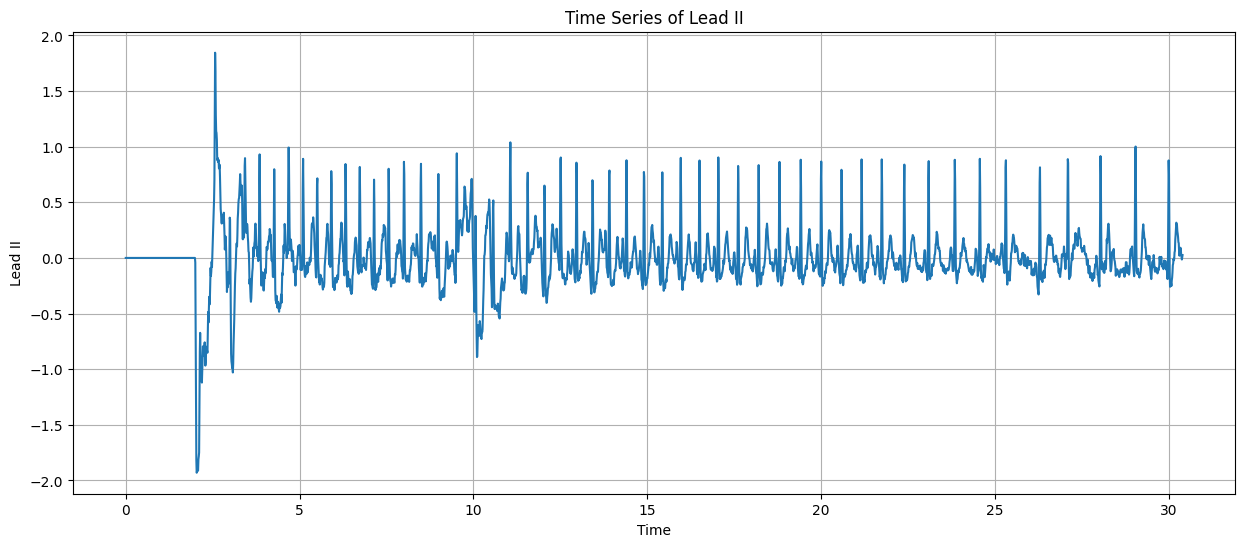

In [8]:
df2 = pd.DataFrame(dive)

# Plot the data to visually inspect
plt.figure(figsize=(15, 6))
plt.plot(df2['Time'], df2['Lead II'])
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('Time Series of Lead II')
plt.grid(True)
plt.show()

## Detect R waves in the window between 25 and 30 seconds

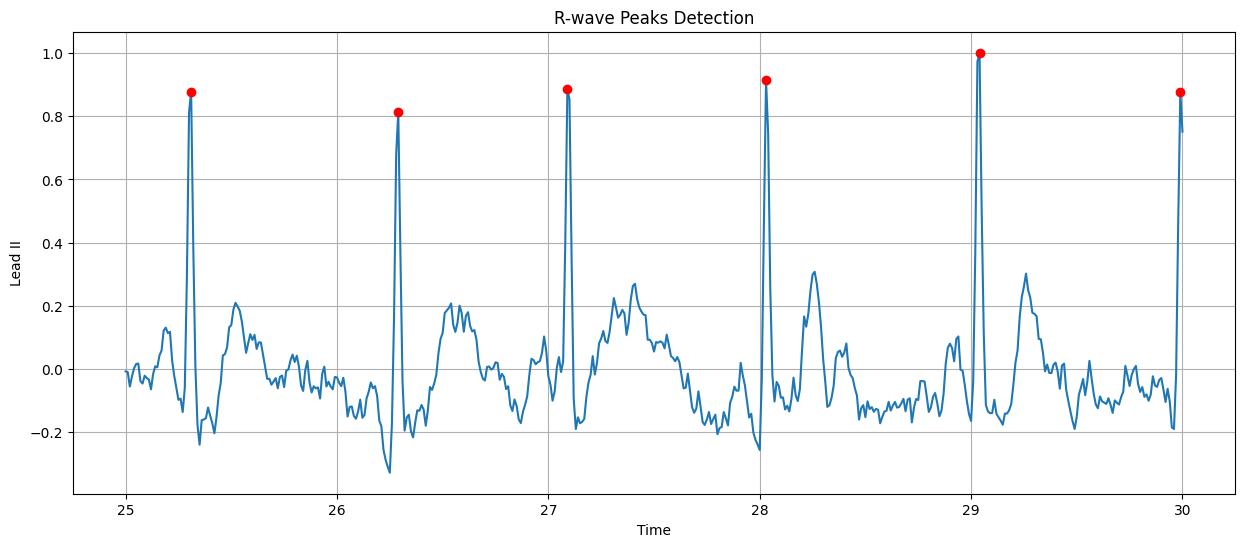

In [9]:
# Filter the DataFrame for the specific time window
windowed_df2 = df2[(df2['Time'] >= 25) & (df2['Time'] <= 30)]

# Assuming you have a method to detect peaks, identify R-peaks in this window
# (You might need to adjust this depending on your peak detection method)
windowed_peak_indices2, _ = find_peaks(windowed_df2['Lead II'], height=.5)  # Replace 'detect_peaks' and 'ECG_Data' accordingly

# Plot the data with detected peaks
plt.figure(figsize=(15, 6))
plt.plot(windowed_df2['Time'], windowed_df2['Lead II'])
plt.plot(windowed_df2['Time'].iloc[windowed_peak_indices2], windowed_df2['Lead II'].iloc[windowed_peak_indices2], 'ro')
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('R-wave Peaks Detection')
plt.grid(True)
plt.show()

## Calculate the HR at the window between 25 and 30 seconds

In [10]:
# Filter the DataFrame for the specific time window
windowed_df2 = df2[(df2['Time'] >= 25) & (df2['Time'] <= 30)]

# Assuming you have a method to detect peaks, identify R-peaks in this window
# (You might need to adjust this depending on your peak detection method)
windowed_peak_indices2, _ = find_peaks(windowed_df2['Lead II'], height=.5)  # Replace 'detect_peaks' and 'ECG_Data' accordingly

# Calculate RR intervals for this window
windowed_rr_intervals2 = windowed_df2['Time'].iloc[windowed_peak_indices2].diff().dropna().values

# Calculate heart rate in BPM for this window
average_windowed_rr_interval2 = windowed_rr_intervals2.mean()
windowed_heart_rate2 = 60 / average_windowed_rr_interval2

print(f"Average RR interval in the window: {average_windowed_rr_interval2:.2f} seconds")
print(f"Heart rate in the window: {windowed_heart_rate2:.2f} BPM")

Average RR interval in the window: 0.94 seconds
Heart rate in the window: 64.10 BPM


## Import data (control (holding breath) and head submerged) for individual #2

In [11]:
control2 = pd.read_csv ('Held_Breath_AI.csv')
control2

,Time,Lead II,Unnamed: 2
0,0.00,0.000513,NaN
1,0.01,0.000089,NaN
2,0.02,0.001393,NaN
3,0.03,0.000043,NaN
4,0.04,0.000963,NaN
...,...,...,...
3015,30.15,-0.102142,NaN
3016,30.16,0.852238,NaN
3017,30.17,0.661713,NaN
3018,30.18,-0.081115,NaN


In [12]:
dive2 = pd.read_csv ('Divers_Response_AI.csv')
dive2

,Time,Lead II
0,0.00,0.005041
1,0.01,0.001809
2,0.02,0.003359
3,0.03,0.000048
4,0.04,0.002735
...,...,...
3035,30.35,-0.132575
3036,30.36,-0.035323
3037,30.37,0.557378
3038,30.38,-0.051596


## Visualize control data (holding breath without submmersion)

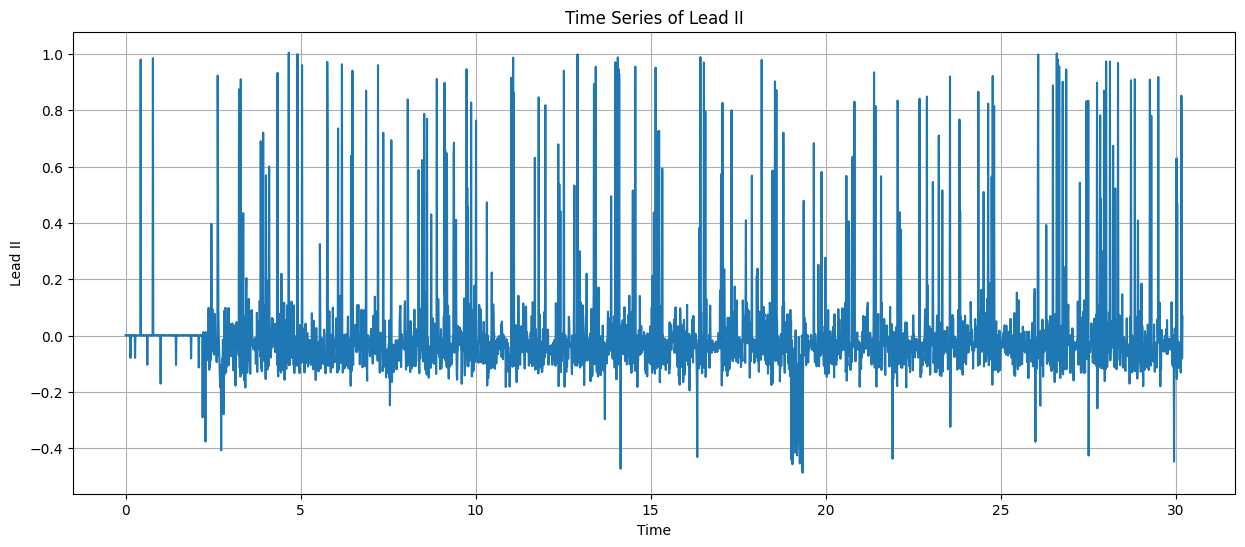

In [13]:
df3 = pd.DataFrame(control2)

# Plot the data to visually inspect
plt.figure(figsize=(15, 6))
plt.plot(df3['Time'], df3['Lead II'])
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('Time Series of Lead II')
plt.grid(True)
plt.show()

## Detect R waves in the window between 18 and 22.5 seconds

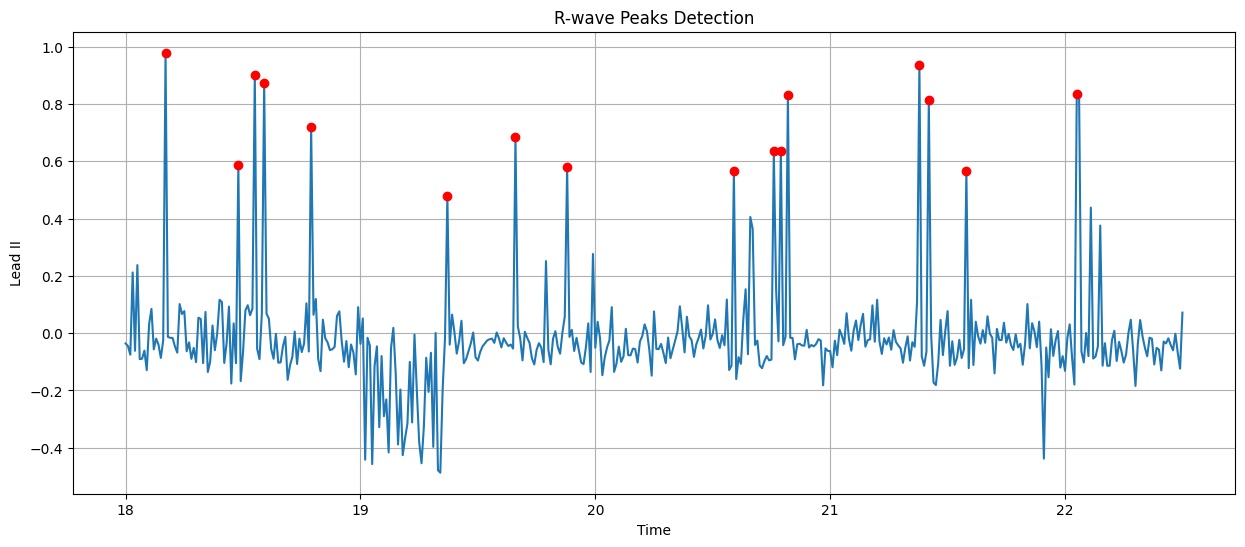

In [14]:
# Filter the DataFrame for the specific time window
windowed_df3 = df3[(df3['Time'] >= 18) & (df3['Time'] <= 22.5)]
# Assuming you have a method to detect peaks, identify R-peaks in this window
# (You might need to adjust this depending on your peak detection method)
windowed_peak_indices3, _ = find_peaks(windowed_df3['Lead II'], height=.47)  # Replace 'detect_peaks' and 'ECG_Data' accordingly

# Plot the data with detected peaks
plt.figure(figsize=(15, 6))
plt.plot(windowed_df3['Time'], windowed_df3['Lead II'])
plt.plot(windowed_df3['Time'].iloc[windowed_peak_indices3], windowed_df3['Lead II'].iloc[windowed_peak_indices3], 'ro')
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('R-wave Peaks Detection')
plt.grid(True)
plt.show()

## Calculate the HR at the window between 18 and 22.5 seconds

In [15]:
# Filter the DataFrame for the specific time window
windowed_df3 = df3[(df3['Time'] >= 18) & (df3['Time'] <= 22.5)]

# Assuming you have a method to detect peaks, identify R-peaks in this window
# (You might need to adjust this depending on your peak detection method)
windowed_peak_indices3, _ = find_peaks(windowed_df3['Lead II'], height=.47)  # Replace 'detect_peaks' and 'ECG_Data' accordingly

# Calculate RR intervals for this window
windowed_rr_intervals3 = windowed_df3['Time'].iloc[windowed_peak_indices3].diff().dropna().values

# Calculate heart rate in BPM for this window
average_windowed_rr_interval3 = windowed_rr_intervals3.mean()
windowed_heart_rate3 = 60 / average_windowed_rr_interval3

print(f"Average RR interval in the window: {average_windowed_rr_interval3:.2f} seconds")
print(f"Heart rate in the window: {windowed_heart_rate3:.2f} BPM")

Average RR interval in the window: 0.26 seconds
Heart rate in the window: 231.96 BPM


## Visualize the data from face submerged in icy water

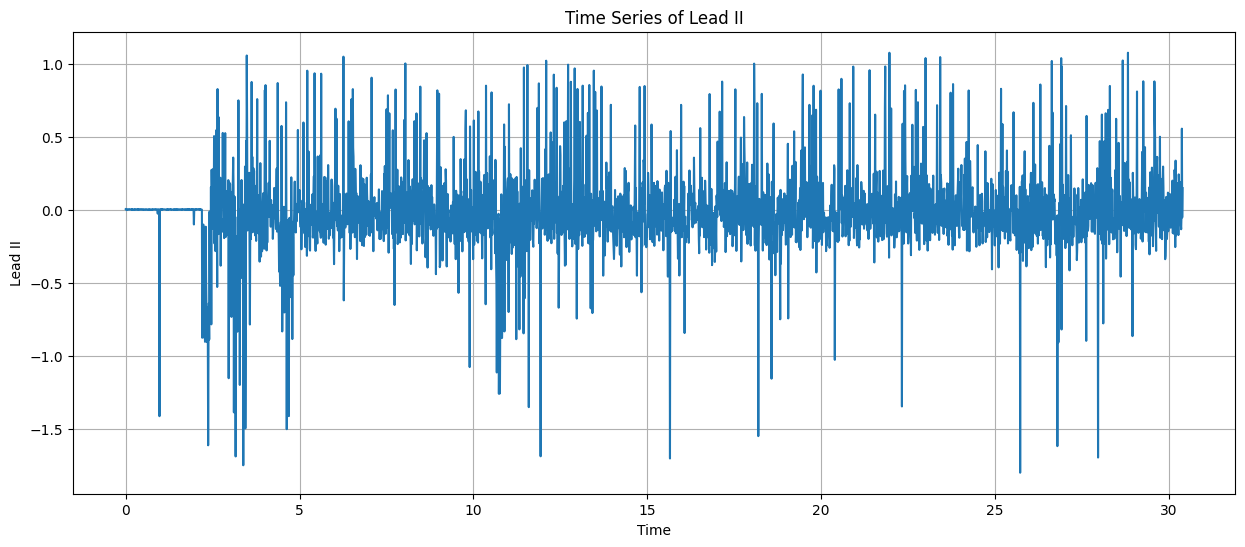

In [16]:
df4 = pd.DataFrame(dive2)

# Plot the data to visually inspect
plt.figure(figsize=(15, 6))
plt.plot(df4['Time'], df4['Lead II'])
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('Time Series of Lead II')
plt.grid(True)
plt.show()

## Detect R waves in the window between 18 and 22.5 seconds

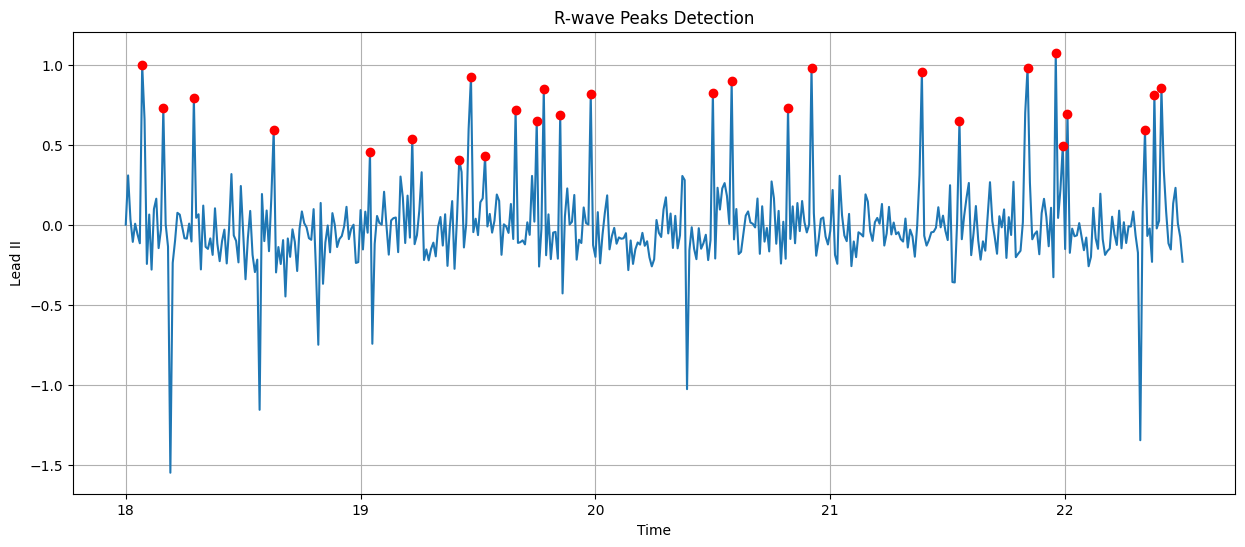

In [17]:
# Filter the DataFrame for the specific time window
windowed_df4 = df4[(df4['Time'] >= 18) & (df4['Time'] <= 22.5)]

# Assuming you have a method to detect peaks, identify R-peaks in this window
# (You might need to adjust this depending on your peak detection method)
windowed_peak_indices4, _ = find_peaks(windowed_df4['Lead II'], height=.4)  # Replace 'detect_peaks' and 'ECG_Data' accordingly

# Plot the data with detected peaks
plt.figure(figsize=(15, 6))
plt.plot(windowed_df4['Time'], windowed_df4['Lead II'])
plt.plot(windowed_df4['Time'].iloc[windowed_peak_indices4], windowed_df4['Lead II'].iloc[windowed_peak_indices4], 'ro')
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('R-wave Peaks Detection')
plt.grid(True)
plt.show()

## Calculate the HR at the window between 18 and 22.5 seconds

In [18]:
# Filter the DataFrame for the specific time window
windowed_df4 = df4[(df4['Time'] >= 18) & (df4['Time'] <= 22.5)]

# Assuming you have a method to detect peaks, identify R-peaks in this window
# (You might need to adjust this depending on your peak detection method)
windowed_peak_indices4, _ = find_peaks(windowed_df4['Lead II'], height=.4)  # Replace 'detect_peaks' and 'ECG_Data' accordingly

# Calculate RR intervals for this window
windowed_rr_intervals4 = windowed_df4['Time'].iloc[windowed_peak_indices4].diff().dropna().values

# Calculate heart rate in BPM for this window
average_windowed_rr_interval4 = windowed_rr_intervals4.mean()
windowed_heart_rate4 = 60 / average_windowed_rr_interval4

print(f"Average RR interval in the window: {average_windowed_rr_interval4:.2f} seconds")
print(f"Heart rate in the window: {windowed_heart_rate4:.2f} BPM")

Average RR interval in the window: 0.17 seconds
Heart rate in the window: 359.45 BPM


## Combine the data together

In [19]:
air_HR = [windowed_heart_rate, windowed_heart_rate3]
water_HR = [windowed_heart_rate2, windowed_heart_rate4]

In [20]:
# Calculate mean and standard deviation for males
A_mean = np.mean(air_HR)
A_sem = np.std(air_HR)

# Calculate mean and standard deviation for females
W_mean = np.mean(water_HR)
W_sem = np.std(water_HR)

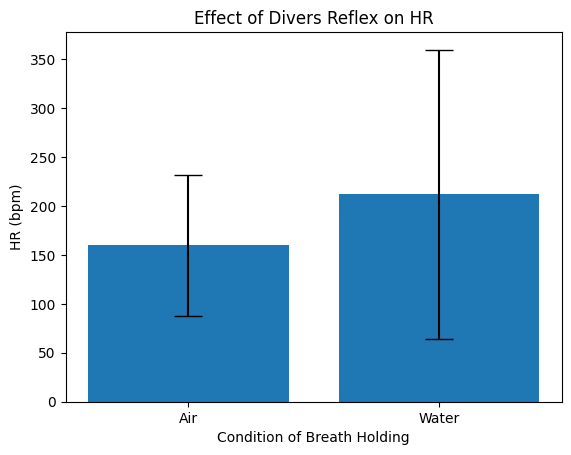

In [21]:
# build a bar plot
plt.bar(['Air', 'Water'],[A_mean, W_mean], yerr=[A_sem, W_sem], capsize=10)
plt.xlabel('Condition of Breath Holding')
plt.ylabel('HR (bpm)')
plt.title('Effect of Divers Reflex on HR')
plt.show()

## Perform a t test to determine significance (note: pvalue of less than 0.05 is considered significant)

In [22]:
#vis1 and aud1 refer to your columns that you are comparing (that you defined above)

res = stats.ttest_ind(air_HR, water_HR,
                      equal_var=True)

display(res)

TtestResult(statistic=-0.3175466354520619, pvalue=0.7809156002736605, df=2.0)